In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
time_zones = [ rec['tz'] for rec in records if 'tz' in rec ]

In [7]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
frame = pd.DataFrame(records)

In [15]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [16]:
frame["tz"][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [17]:
tz_counts = frame['tz'].value_counts()

In [18]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [21]:
clean_tz = frame['tz'].fillna("Missing")
clean_tz[ clean_tz == '' ] = "Unknow"
tz_counts = clean_tz.value_counts()

In [22]:
tz_counts[:10]

America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
subset = tz_counts[:10]

<IPython.core.display.Javascript object>


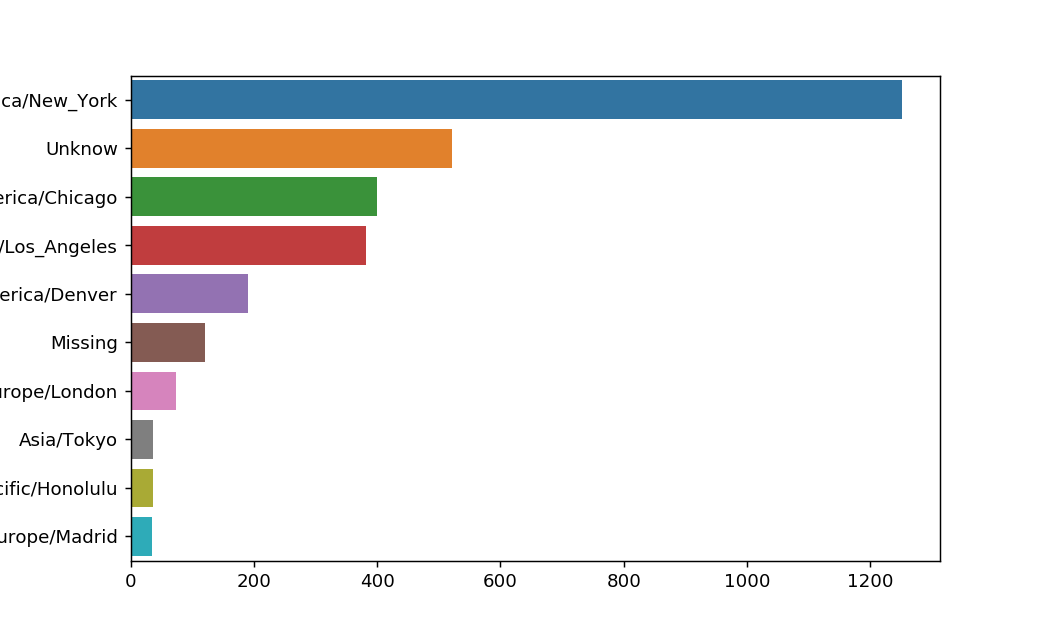

In [26]:
sns.barplot(y=subset.index, x=subset.values)

In [31]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [37]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [39]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [41]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [44]:
cframe = frame[frame.a.notnull()]

In [67]:
aa = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows")

In [79]:
cframe["os"] = aa

F:\my_work\day_20200229\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
cframe["os"].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [82]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [87]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [88]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [92]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [114]:
count_subset = agg_counts.take( indexer[-10:] )
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [107]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [115]:
count_subset = count_subset.stack()

In [116]:
count_subset.name = 'total'

In [118]:
count_subset = count_subset.reset_index()

In [120]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<IPython.core.display.Javascript object>


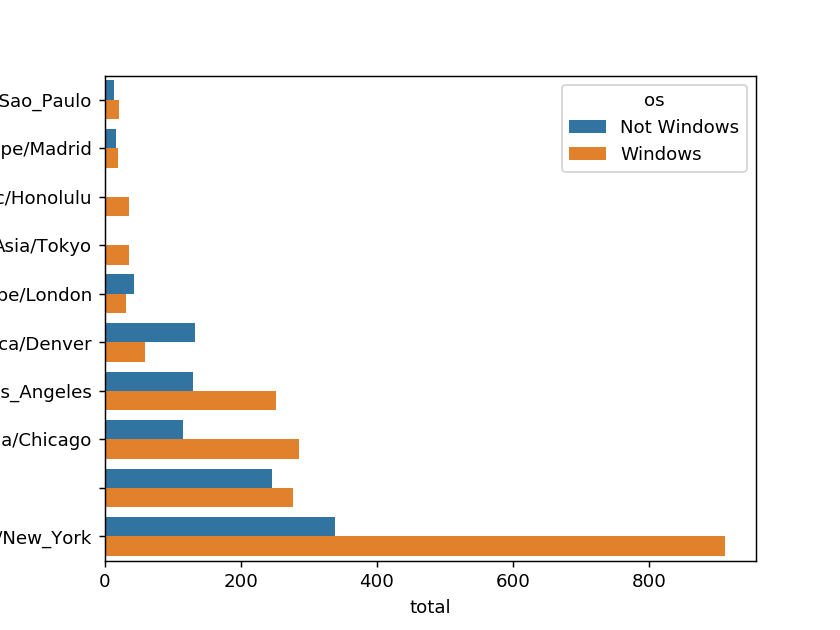

In [126]:
sns.barplot(x="total", y='tz',
            hue="os", data=count_subset)

In [127]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [137]:
results = count_subset.groupby('tz').apply(norm_total)

<IPython.core.display.Javascript object>


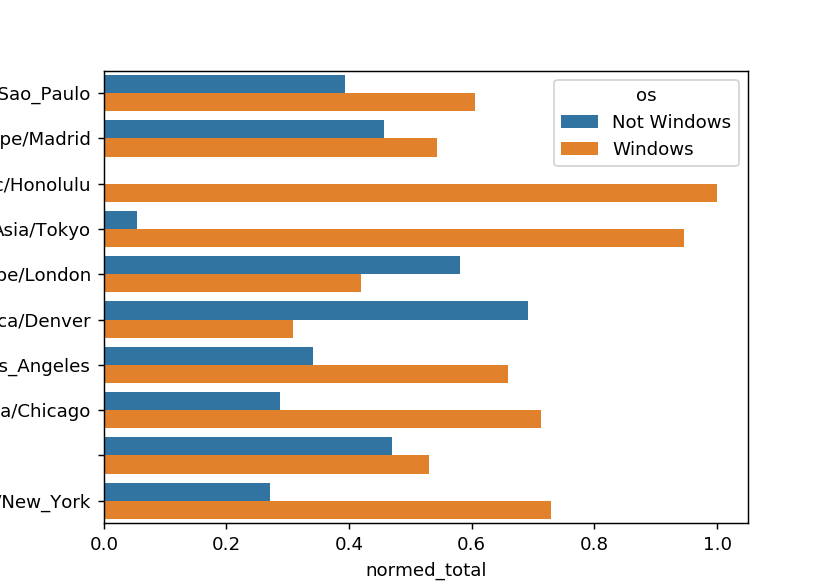

In [141]:
sns.barplot(x="normed_total", y="tz",
            hue="os", data= results )

In [142]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform("sum")

## 14.2 MovieLens 1M数据集

In [145]:
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat',
                      sep='::',header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', 
                        sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', 
                       sep='::', header=None, names=mnames, engine='python')

In [146]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [147]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [148]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [149]:
data = pd.merge(pd.merge(ratings, users), movies)

In [152]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [153]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [192]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

In [195]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [196]:
ratings_by_title = data.groupby("title").size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [197]:
active_titles = ratings_by_title[ ratings_by_title >= 250 ]
active_titles

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [200]:
mean_ratings_250 = mean_ratings.loc[active_titles.index]

In [201]:
mean_ratings_250

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [204]:
top_female_ratings_250 = mean_ratings_250.sort_values(by="F", ascending=False)
top_female_ratings_250[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [205]:
mean_ratings_250["diff"] = mean_ratings_250['M'] - mean_ratings_250["F"]

In [209]:
sorted_by_diff_250 = mean_ratings_250.sort_values(by="diff")

In [210]:
sorted_by_diff_250[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [214]:
sorted_by_diff_250[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [218]:
rating_std_by_title = data.groupby("title")["rating"].std()

In [221]:
rating_std_by_title_250 = rating_std_by_title.loc[active_titles.index]

In [225]:
rating_std_by_title_250.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 14.3 1880-2010年间全美婴儿姓名

In [226]:
names_1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names = ['name', 'sex', 'birth'])

In [227]:
names_1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [229]:
names_1880.groupby('sex')["birth"].sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [233]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [234]:
for year in years:
    path = "datasets/babynames/yob%d.txt" %(year)
    frame = pd.read_csv(path, names=columns)
    
    frame["year"] = year
    pieces.append(frame)

In [237]:
names = pd.concat(pieces, ignore_index=True)

In [238]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [240]:
total_births = names.pivot_table("births", index="year",
                                columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<IPython.core.display.Javascript object>


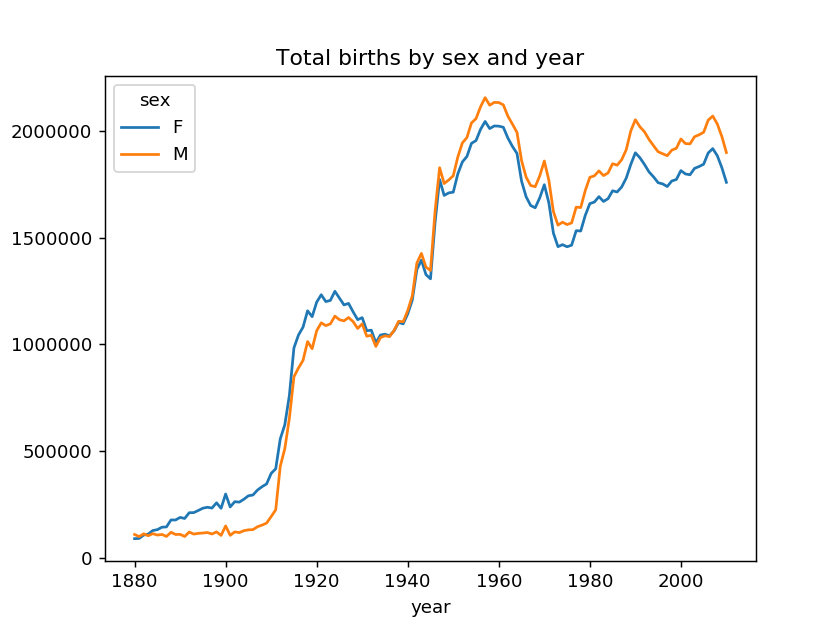

In [241]:
total_births.plot(title="Total births by sex and year")

In [242]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [244]:
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [247]:
names.groupby(['year', 'sex'])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [248]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [252]:
top_1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top_1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [255]:
top_1000.reset_index(inplace=True, drop=True)

In [256]:
top_1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [271]:
top_1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [272]:
boys = top_1000[ top_1000["sex"] == "M"]
girls = top_1000[ top_1000["sex"] == "F"]

In [277]:
total_births = top_1000.pivot_table('births', index='year',
                                    columns="name", aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [278]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [280]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [286]:
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


<IPython.core.display.Javascript object>


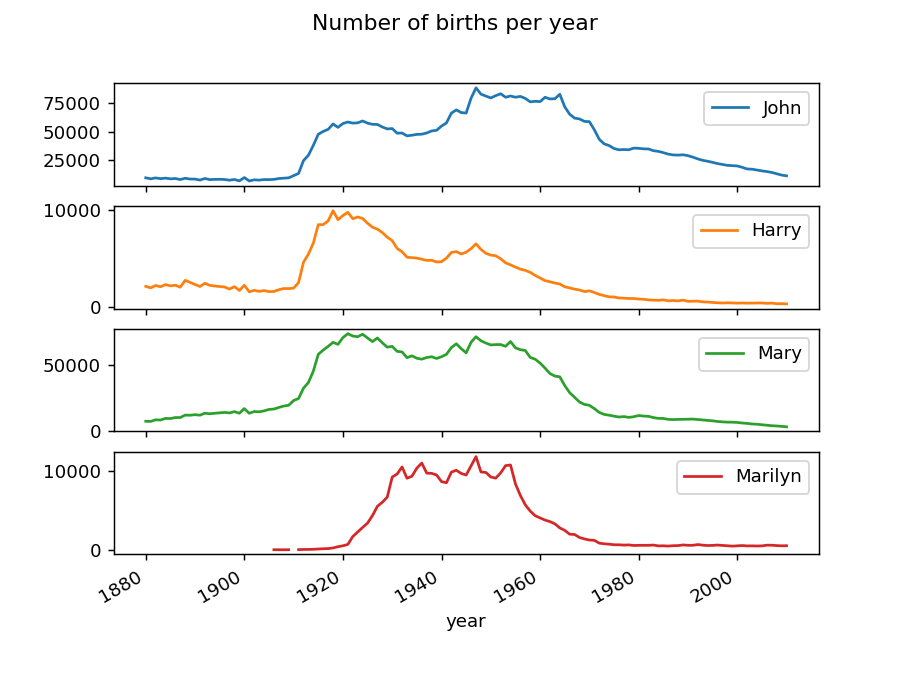

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C64E4C8C48>,
      dtype=object)

In [301]:
subset.plot(subplots = True, figsize=(8, 8), grid=False,
           title="Number of births per year")

In [308]:
table = top_1000.pivot_table("prop", index="year",
                    columns="sex", aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<IPython.core.display.Javascript object>


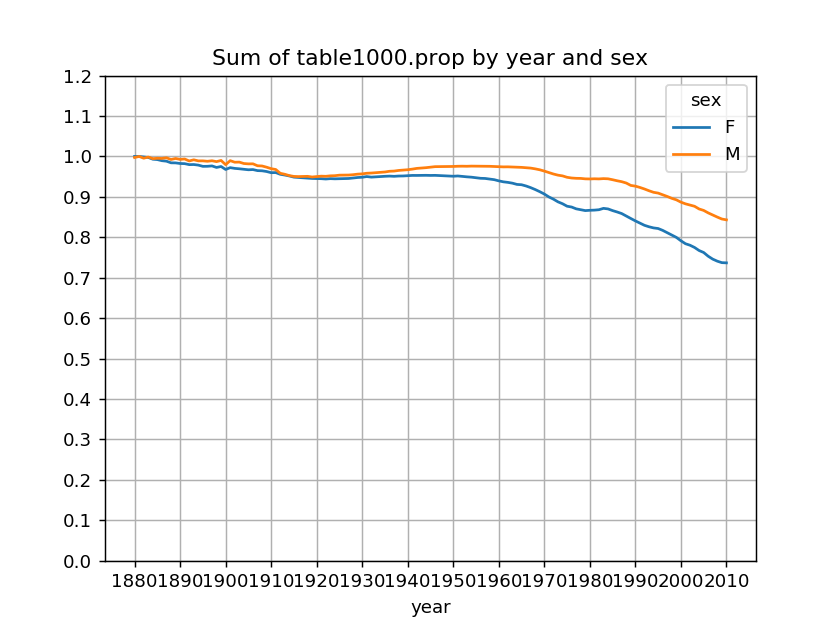

In [314]:
table.plot(title='Sum of table1000.prop by year and sex',
           grid=True,
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10)
          )

In [319]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [329]:
prop_cumsum = df.sort_values(by="prop", ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [332]:
prop_cumsum.values.searchsorted(0.5)

116

In [335]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by="prop", ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [336]:
def get_quantile_count(group, q=0.5):
    year_X = group.sort_values(by="prop", ascending=False).prop.cumsum()
    return year_X.values.searchsorted(q) + 1

In [349]:
diversity = top_1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [350]:
diversity = diversity.unstack("sex")

In [351]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<IPython.core.display.Javascript object>


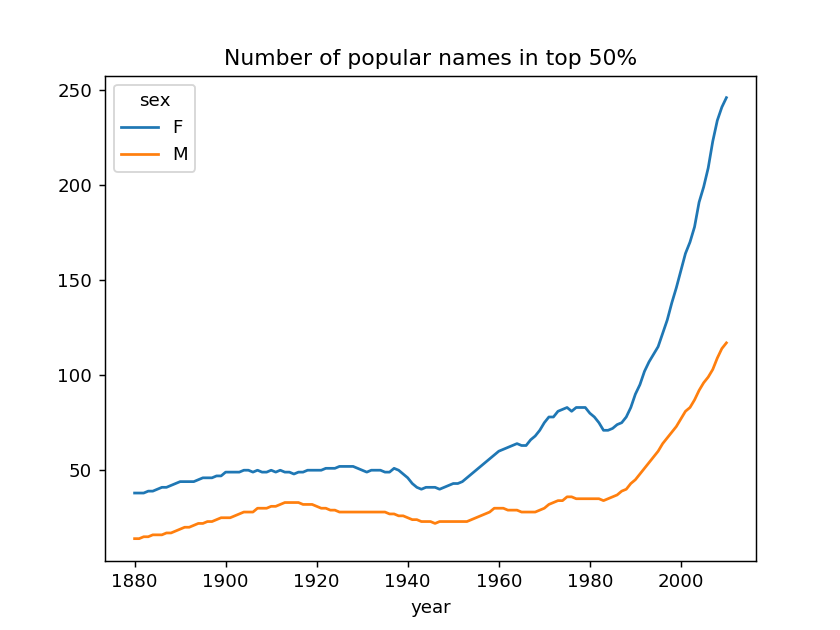

In [353]:
diversity.plot(title="Number of popular names in top 50%")

In [354]:
get_last_letter = lambda x: x[-1]

In [360]:
last_letters = names.name.map(get_last_letter)

In [362]:
last_letters.name = "last_letter"

In [374]:
table = names.pivot_table("births", index=last_letters,
                 columns=["sex", "year"], aggfunc=sum)

In [377]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [380]:
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [381]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [383]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<IPython.core.display.Javascript object>


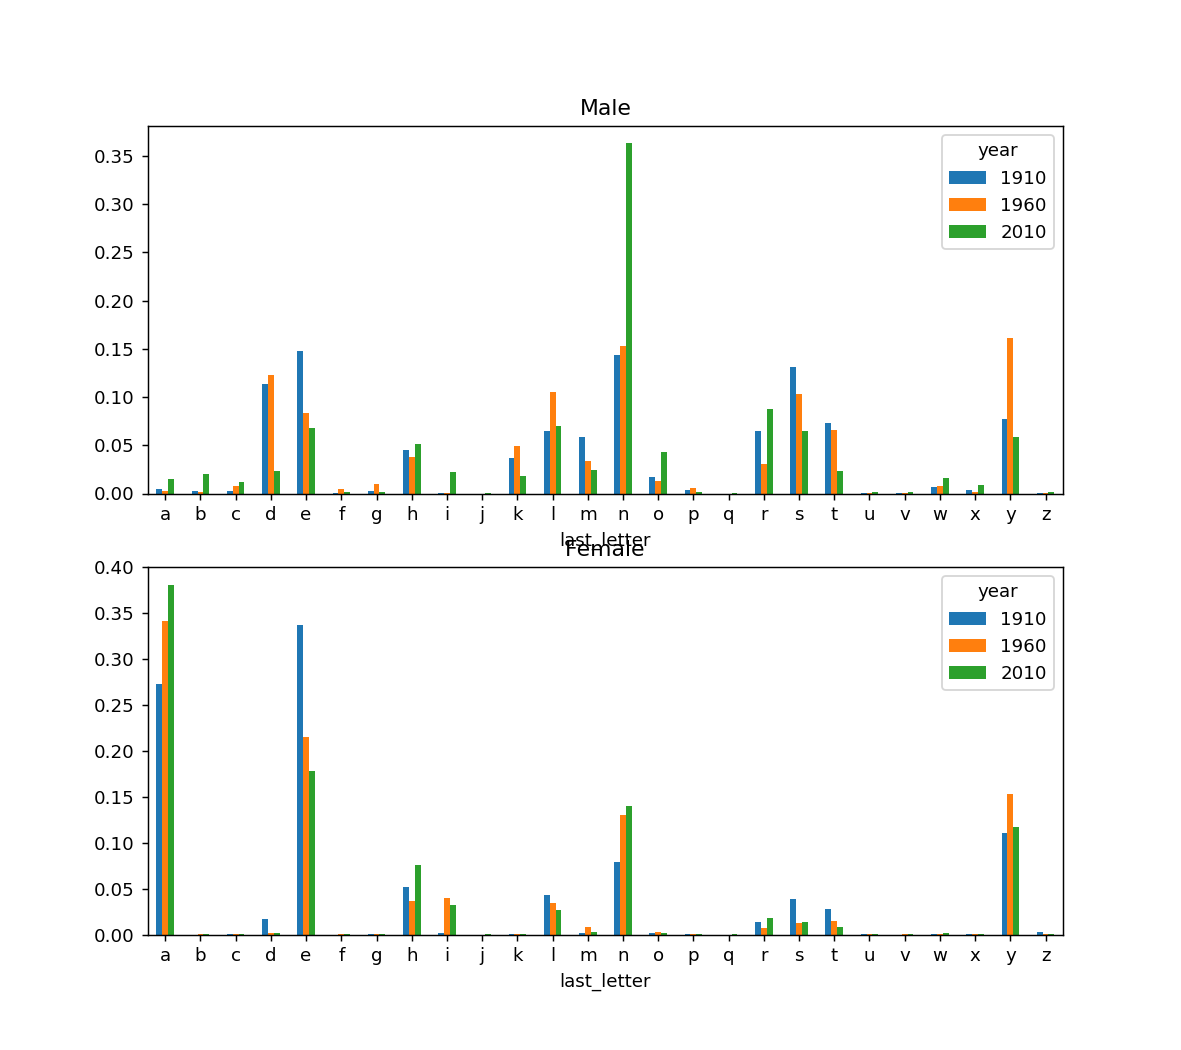

In [397]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(9, 8))

In [398]:
letter_prop['M'].plot(kind="bar", rot=0, ax=axes[0], title='Male' )
letter_prop['F'].plot(kind="bar", rot=0, ax=axes[1], title='Female' )

In [402]:
letter_prop = table / table.sum()

In [408]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<IPython.core.display.Javascript object>


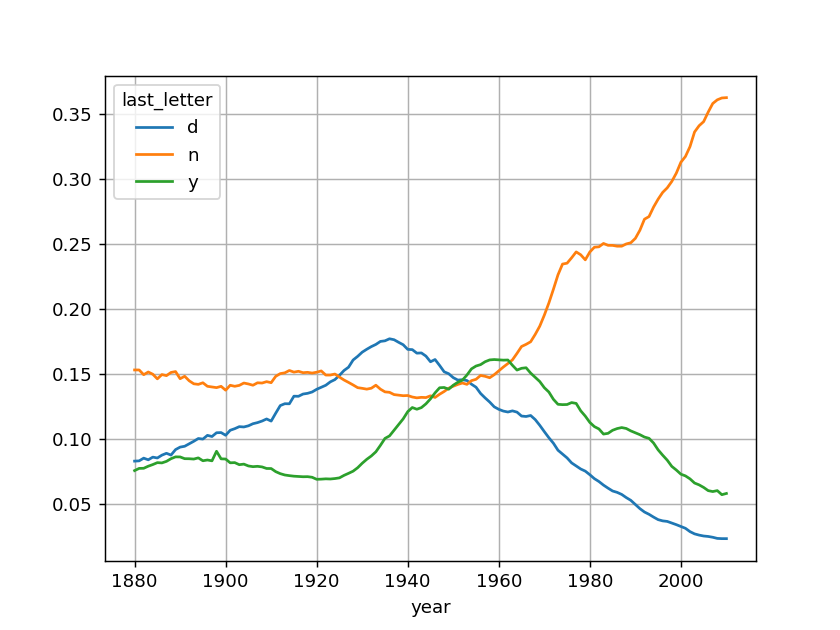

In [411]:
dny_ts.plot(grid=True)

In [415]:
all_names = pd.Series(top_1000.name.unique())

In [425]:
lesley_like = all_names[ all_names.str.lower().str.contains("lesl") ]

In [426]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [431]:
filtered = top_1000[ top_1000.name.isin(lesley_like) ]

In [436]:
filtered.groupby("name").births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [437]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [438]:
table = filtered.pivot_table('births', index="year",
                             columns = "sex", aggfunc="sum")

In [440]:
table = table.div(table.sum(axis=1), axis=0)

In [441]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<IPython.core.display.Javascript object>


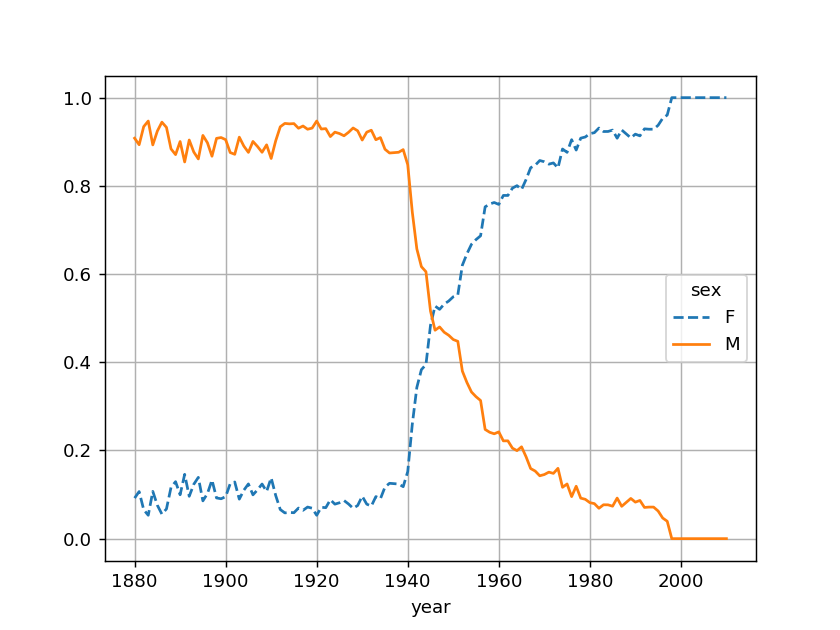

In [448]:
table.fillna(0).plot(grid=True, style={'M': '-', 'F':'--'})

## 14.4 USDA食品数据库

In [449]:
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

In [461]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [463]:
db[0]["nutrients"][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [466]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [489]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

In [491]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [492]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [494]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [508]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [509]:
tmp1 = len(db)
list1 = []
for line_index in range(tmp1):
    nutrients = pd.DataFrame(db[line_index]['nutrients'])
    nutrients['id'] = db[line_index]['id']
    list1.append(nutrients)

In [514]:
nutrients = pd.concat(list1, ignore_index=True)

In [515]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [519]:
nutrients.duplicated().sum()

14179

In [520]:
nutrients = nutrients.drop_duplicates()

In [523]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

In [527]:
info = info.rename(columns=col_mapping, copy=False)

In [528]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [529]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [530]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [532]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [533]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [535]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [537]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


In [539]:
result = ndata.groupby(['nutrient', 'fgroup'])['value' ].quantile(0.5)

In [543]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

<IPython.core.display.Javascript object>


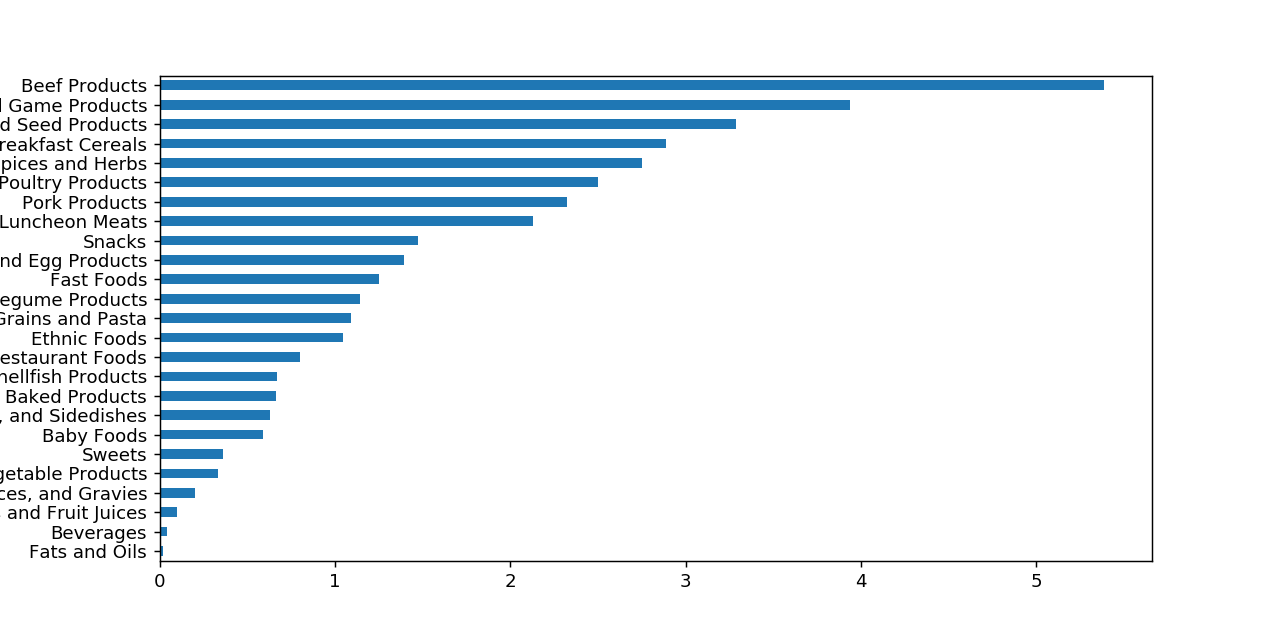

In [554]:
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [556]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


In [557]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [558]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [577]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [578]:
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [579]:
max_foods.food = max_foods.food.str[:50]

In [599]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 14.5 2012联邦选举委员会数据库

In [601]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)

In [605]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [622]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [623]:
unique_cands = fec.cand_nm.unique()

In [624]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [625]:
unique_cands[2]

'Obama, Barack'

In [626]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [627]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [628]:
 fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [629]:
fec['party'] = fec.cand_nm.map(parties)

In [631]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [633]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [634]:
fec = fec[ fec.contb_receipt_amt > 0 ]

In [635]:
fec_mrbo = fec[ fec.cand_nm.isin(['Obama, Barack','Romney, Mitt']) ]

In [638]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [639]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

In [640]:
fec.contbr_occupation

0                                         RETIRED
1                                         RETIRED
2                           INFORMATION REQUESTED
3                                         RETIRED
4                                         RETIRED
                            ...                  
1001726    INFORMATION REQUESTED PER BEST EFFORTS
1001727                            BUSINESS OWNER
1001728    INFORMATION REQUESTED PER BEST EFFORTS
1001729              LONGWALL MAINTENANCE FOREMAN
1001730    INFORMATION REQUESTED PER BEST EFFORTS
Name: contbr_occupation, Length: 991475, dtype: object

In [646]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

F:\my_work\day_20200229\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [648]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
f = lambda x: emp_mapping.get(x, x)

In [650]:
fec.contbr_employer = fec.contbr_employer.map(f)

F:\my_work\day_20200229\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [652]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [653]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns="party", aggfunc='sum')

In [663]:
over_2mm = by_occupation[ by_occupation.sum(1) > 2000000 ]

In [664]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


<IPython.core.display.Javascript object>


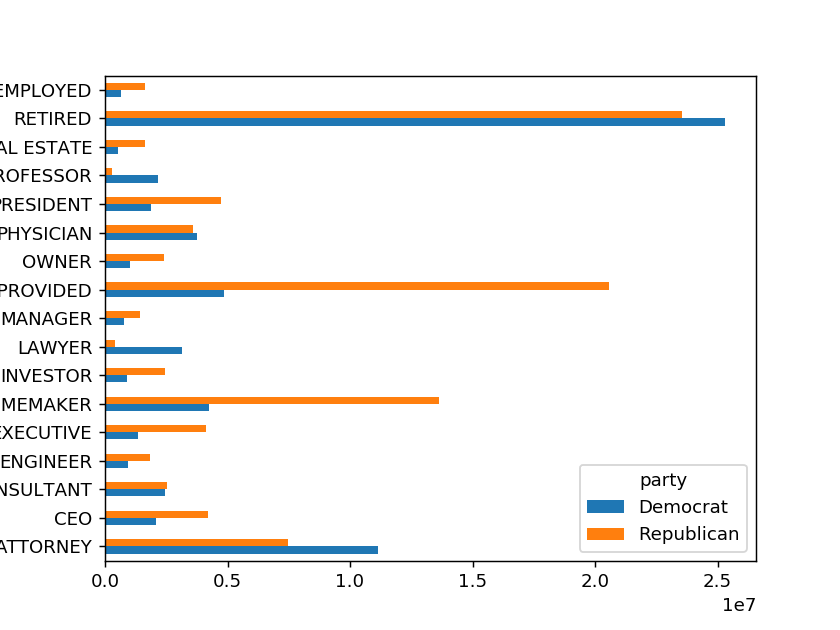

In [670]:
over_2mm.plot(kind='barh')

In [671]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [672]:
grouped = fec_mrbo.groupby('cand_nm')

In [674]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [676]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### 对出资额分组

In [677]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])

In [681]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [682]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [683]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [688]:
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
                                       ...  
Romney, Mitt   (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
               (100000, 1000000]           0
               (1000000, 10000000]         0
Length: 16, dtype: int64

In [694]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [698]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [699]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [706]:
normed_sums = bucket_sums.div( bucket_sums.sum(axis=1), axis=0)

In [707]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<IPython.core.display.Javascript object>


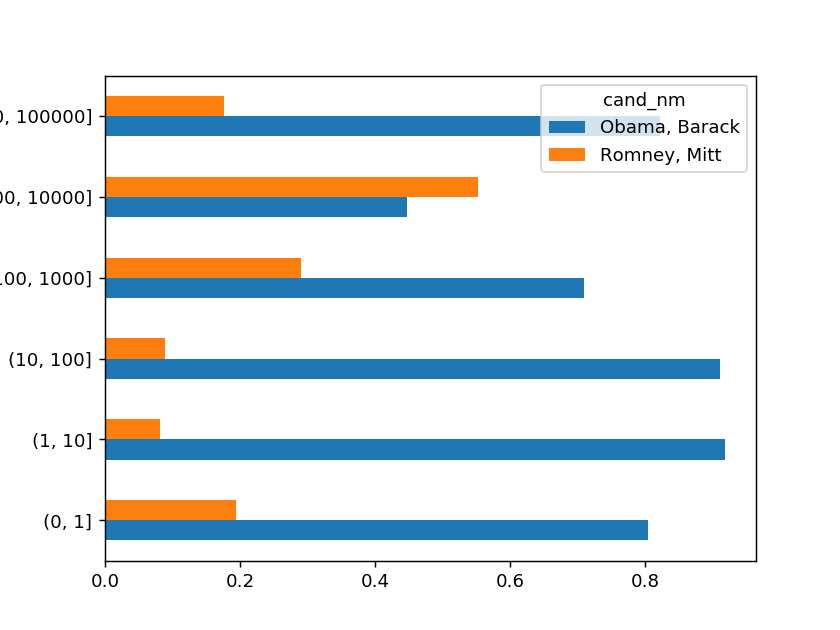

In [712]:
normed_sums[:-2].plot(kind="barh")

In [713]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [721]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [725]:
totals = totals[ totals.sum(axis=1) > 100000 ]

In [727]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [728]:
percent = totals.div( totals.sum(axis=1), axis=0 )

In [734]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


<IPython.core.display.Javascript object>


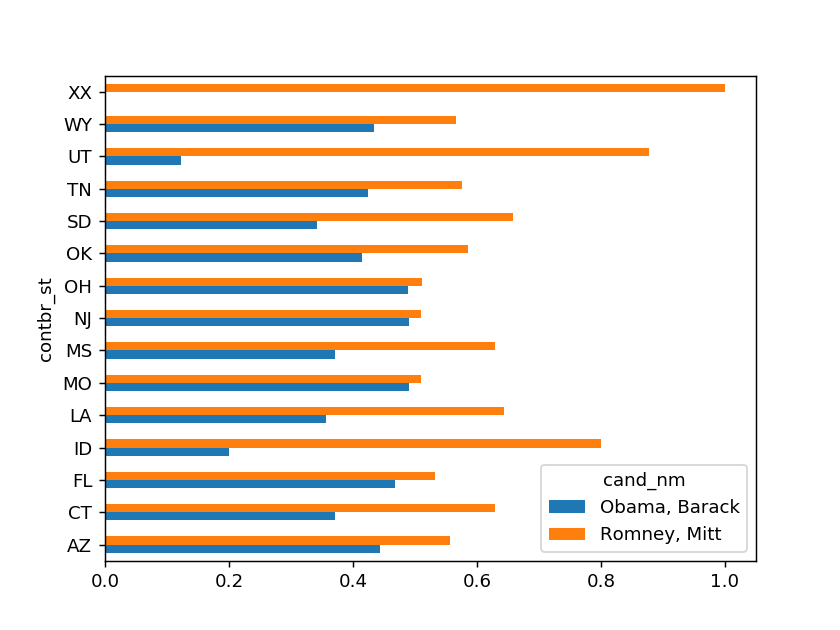

In [743]:
percent[ percent["Obama, Barack"] < 0.5 ].plot(kind="barh")